In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk

In [2]:
datasets = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'messages'])

In [3]:
datasets.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
datasets.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

Text(0.5, 1.0, 'Label counts')

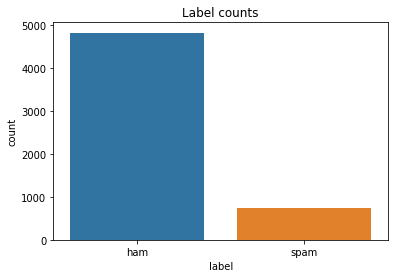

In [5]:
sns.countplot(x='label', data=datasets)
plt.title('Label counts')

In [6]:
# Creating wordcloud for data visulization
def creat_wordcloud(words):
    wordCloud = WordCloud(width=800, height=500, random_state=15, max_font_size=200)
    wordCloud.generate(words)
    plt.figure(figsize=(10,7))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

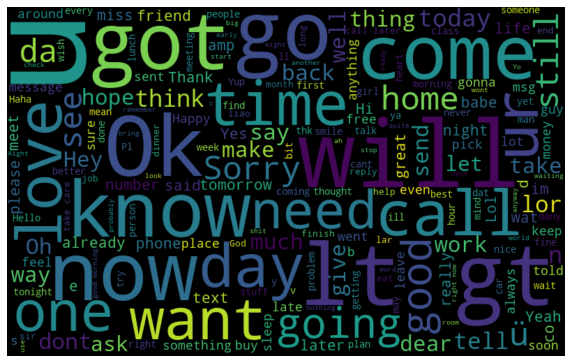

In [7]:
ham_datasets = datasets[datasets.label=='ham']
text = ham_datasets.messages.values
words = ' '.join(text)
creat_wordcloud(words)

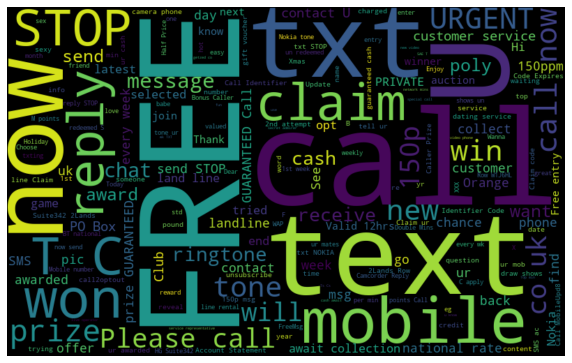

In [8]:
spam_datasets = datasets[datasets.label=='spam']
text = spam_datasets.messages.values
words = ' '.join(text)
creat_wordcloud(words)

In [9]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sandesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
ps = PorterStemmer()

In [11]:
# Data preprocessing
def corpus_processing(datasets):
    cor = []
    for i in range(0, len(datasets)):
        regular_exp = re.sub('[^a-zA-Z]', ' ', datasets[i])
        lower_words = regular_exp.lower()
        lower_words = lower_words.split()
        stopwords_sen = [ps.stem(word) for word in lower_words if word not in stopwords.words('english')]
        final_sen = ' '.join(stopwords_sen)
        cor.append(final_sen)
    return cor

In [12]:
corpus = corpus_processing(datasets.messages)

In [13]:
# Feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
tf = TfidfVectorizer(max_features=2500)

In [15]:
X = tf.fit_transform(corpus).toarray()

In [16]:
y = pd.get_dummies(datasets.label)['ham'].values

In [17]:
# Splitting data for training and testing
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [19]:
# Model training using ML algorithm
from sklearn.naive_bayes import MultinomialNB

In [20]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [21]:
y_pred = model.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [23]:
accuracy_score(y_pred, y_test)

0.967713004484305

In [24]:
confusion_matrix(y_pred, y_test)

array([[124,   2],
       [ 34, 955]])

In [25]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87       126
           1       1.00      0.97      0.98       989

    accuracy                           0.97      1115
   macro avg       0.89      0.97      0.93      1115
weighted avg       0.97      0.97      0.97      1115

